#  <center> 基于维基百科的词向量构建 </center>
word2vec 词向量原理可参考论文 [《word2vec Parameter Learning Explained》（Xin Rong）](https://arxiv.org/pdf/1411.2738.pdf)

## 1.中文维基百科下载
* [https://dumps.wikimedia.org/zhwiki/](https://dumps.wikimedia.org/zhwiki/)

## 2. 使用[python wikipedia extractor](https://github.com/attardi/wikiextractor)抽取维基百科的内容

* 修改 wikiextractor 的源代码，把不需要的信息滤掉，然后增加相应的切词功能，直接输出下一步做词向量需要的格式，并存入文件。这么做可以减少大量的IO操作，提高处理效率。


## 3.使用 gensim 库获取词向量及测试
+ 参考文档
+ [https://radimrehurek.com/gensim/models/word2vec.html](https://radimrehurek.com/gensim/models/word2vec.html)
+ [https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne](https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne)

In [1]:
from gensim.models.word2vec import LineSentence, Word2Vec

In [2]:
mod = Word2Vec.load(r'E:\wiki\zhwiki.model')

In [3]:
mod.corpus_count

4324421

In [4]:
mod.corpus_total_words

204426292

In [5]:
len(mod.wv.vocab)

637277

In [6]:
mod.wv.most_similar('皇马', topn=20)

[('曼联', 0.8840967416763306),
 ('国际米兰', 0.8805743455886841),
 ('曼城', 0.8652613162994385),
 ('尤文图斯', 0.8503109216690063),
 ('爱华顿', 0.8492158651351929),
 ('阿森纳', 0.8449375033378601),
 ('阿仙奴', 0.8434382081031799),
 ('热刺', 0.8425135612487793),
 ('列斯联', 0.8358326554298401),
 ('阿积士', 0.8342398405075073),
 ('新特兰', 0.8315948247909546),
 ('保顿', 0.8294731974601746),
 ('穆里尼奥', 0.8279849290847778),
 ('朗拿甸奴', 0.8238677978515625),
 ('摩连奴', 0.8202006220817566),
 ('巴塞', 0.8188875317573547),
 ('韦斯咸', 0.815527081489563),
 ('狼队', 0.8149043321609497),
 ('谢拉特', 0.8111523389816284),
 ('韦根', 0.8108898401260376)]

In [7]:
mod.wv.most_similar('少林寺', topn=20)

[('少林', 0.8321070671081543),
 ('嵩山少林寺', 0.7800660729408264),
 ('张三丰', 0.7788748741149902),
 ('全真教', 0.7765205502510071),
 ('武当派', 0.7705234289169312),
 ('武当', 0.7561336755752563),
 ('明教', 0.7509621381759644),
 ('峨嵋派', 0.7463289499282837),
 ('张君宝', 0.7453353404998779),
 ('觉远', 0.7423112392425537),
 ('武僧', 0.7422904968261719),
 ('王重阳', 0.7413835525512695),
 ('师父', 0.7355856895446777),
 ('法海', 0.7348222136497498),
 ('镖局', 0.7330089807510376),
 ('华山派', 0.7301296591758728),
 ('和尚', 0.724068820476532),
 ('方丈', 0.7202027440071106),
 ('董海川', 0.7189017534255981),
 ('武学', 0.7185320854187012)]

## 4.使用[Kaggle](https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne)给出的T-SEN进行词向量的可视化。

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [10]:
mod.wv['中国']

array([-4.116283  ,  4.24879   ,  2.5475836 ,  0.35107848, -0.9865252 ,
        1.5183389 , -1.512996  , -2.0564194 , -2.5860646 ,  1.2074541 ,
       -1.767301  , -1.4810133 , -1.4179354 ,  4.1264887 ,  3.4110665 ,
       -3.044541  , -1.3507203 , -2.3959618 ,  2.0633748 ,  0.72211653,
        0.23487996,  0.93932146,  0.20973912,  0.66657203, -0.35481188,
        0.92863035, -0.21931174,  5.404502  , -2.4346366 , -0.8363417 ,
        1.8882843 , -1.4701098 ,  2.4728963 , -1.0574149 ,  2.0795143 ,
       -2.9422894 , -0.09468927,  1.6654397 ,  0.5327816 ,  0.07627148,
        1.4209344 ,  1.5514342 , -0.8328121 ,  0.58930486, -0.2681957 ,
        1.3130016 , -1.9526407 , -2.532157  ,  0.81756234,  1.0259867 ,
        0.5242653 , -1.5990702 , -1.0297523 , -2.2049508 ,  3.7672436 ,
        0.44768494,  3.2372432 , -2.2328374 , -2.2616005 ,  0.5635164 ,
        5.099013  ,  1.245148  ,  3.1478724 , -1.3809338 , -1.2905078 ,
       -2.164315  , -1.62212   ,  0.604296  , -2.5373821 , -1.16

In [11]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.vocab.keys())[:800]:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(
            labels[i],
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom'
        )
    plt.show()

In [12]:
mod_1000 = Word2Vec.load(r'E:\wiki\zhwiki_lev1000.model')

C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


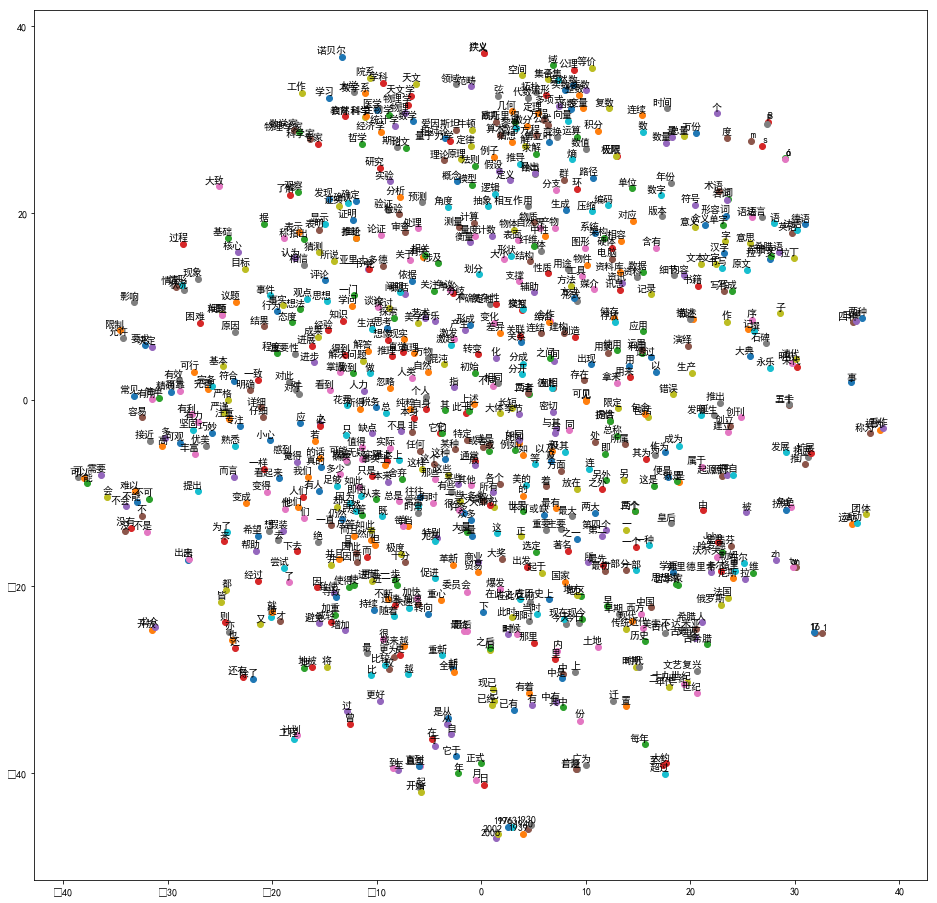

In [13]:
tsne_plot(mod_1000)